# 7. 데이터 분석 Data Analysis

In [2]:
!pip install matplotlib

     ---------------------------------------- 0.0/160.4 kB ? eta -:--:--
     ----------------------------- -------- 122.9/160.4 kB 3.6 MB/s eta 0:00:01
     -------------------------------------- 160.4/160.4 kB 4.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
   --- ------------------------------------ 0.7/7.5 MB 14.2 MB/s eta 0:00:01
   ------ --------------------------------- 1.2/7.5 MB 12.7 MB/s eta 0:00:01
   --------- ------------------------------ 1.7/7.5 MB 12.3 MB/s eta 0:00:01
   ------------ --------------------------- 2.3/7.5 MB 12.0 MB/s eta 0:00:01
   -------------- ------------------------- 2.8/7.5 MB 11.9 MB/s eta 0:00:01
   ----------------- ---------------------- 3.3/7.5 MB 11.8 MB/s eta 0:00:01
   -------------------- ------------------- 3.9/7.5 MB 12.3 MB/s eta 0:00:01
   ------------------------ --------------- 4.6/7.5 MB 12.2 MB/s eta 0:00:01
   ---------------------------- ----------- 5.3/7.5 MB 12.0 MB/s eta 0:00:01
   --

## 7-a. 토큰 분포 확인하기

### 7-a-1. 데이터 불러오기

In [2]:
import pandas as pd

# 데이터를 불러옵니다.
data = pd.read_csv('6_normalized_ecopro.csv', encoding="utf-8")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108945 entries, 0 to 108944
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   community       108945 non-null  object
 1   gall_id         108945 non-null  object
 2   search_keyword  108945 non-null  object
 3   number          108945 non-null  int64 
 4   date_created    108945 non-null  object
 5   time_created    108945 non-null  object
 6   author          108945 non-null  object
 7   is_reply        108945 non-null  int64 
 8   text_length     108945 non-null  int64 
 9   spaced_text     108945 non-null  object
 10  tokens          108945 non-null  object
dtypes: int64(3), object(8)
memory usage: 9.1+ MB


In [14]:
data.head(3)

,community,gall_id,search_keyword,number,date_created,time_created,author,is_reply,text_length,spaced_text,tokens
0,dcinside,snp500,에코,832014,2023-10-27,15:50:34,ㅇㅇ(58.78),0,56,국연 에코프로 퍼이상 투자해야한다 전국민 자산증발에 앞서야 추후 글로벌 시장에 조선...,"['국연', '에코프로', '이상', '투자', '국민', '자산', '증발', '..."
1,dcinside,snp500,에코,831598,2023-10-26,21:13:32,슨붕이(106.101),0,11,에코푸로 손절 ㄷㄷㄷ,"['에코프로', '손절', 'ㄷㄷㄷ']"
2,dcinside,snp500,에코,831598,2023-10-26,21:14:04,모든주식을소유하라,1,9,알빠노? 캬ㅋㅋㅋ,"['알빠노', '?', '캬ㅋㅋㅋ']"


### 7-a-2. 'tokens' 열의 데이터를 리스트로 처리

In [4]:
import ast
# 'tokens' 열의 데이터를 리스트로 처리합니다. (이미 리스트인 경우 이 단계는 생략)
data['tokens'] = data['tokens'].apply(ast.literal_eval)

### 7-a-3. 한글 폰트 설정 : matplotlib 에서 한글이 깨지지 않도록 

In [5]:
# 한글 폰트 설정
# matplotlib 에서 한글이 깨지지 않도록 한다
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rcParams['font.family'] = 'Malgun Gothic'

### 7-a-4. 토큰 분포 출력

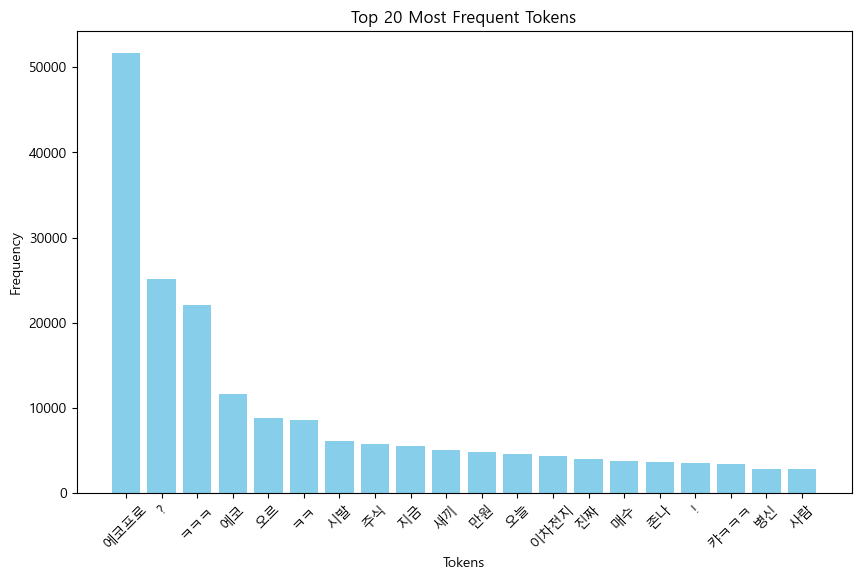

In [6]:
import matplotlib.pyplot as plt
from collections import Counter

# 모든 토큰을 하나의 리스트로 결합합니다.
all_tokens = [token for tokens_list in data['tokens'] for token in tokens_list]

# 토큰의 빈도수를 계산합니다.
token_counts = Counter(all_tokens)

# 가장 많이 등장한 토큰 상위 20개를 추출합니다.
top_tokens = token_counts.most_common(20)

# 시각화합니다.
plt.figure(figsize=(10, 6))
plt.bar([token[0] for token in top_tokens], [token[1] for token in top_tokens], color='skyblue')
plt.xlabel('Tokens')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.title('Top 20 Most Frequent Tokens')
plt.show()


## 7-b. df 의 칼럼 가공하기 

### 7-b-1. 주식 장시간 고려하여 날짜 칼럼 새로 만들기
- 09:00:00 에 장이 열리므로, 이 시간을 하루의 시작으로 한다
- 익일 08:59:59 이 하루의 끝이다 

In [18]:
# 'date_created'와 'time_created' 열을 합쳐서 datetime 객체로 변환합니다.
data['datetime'] = pd.to_datetime(data['date_created'] + ' ' + data['time_created'])

# 새로운 'date' 열을 만들기 위한 함수 정의
def assign_date(row):
    if row.hour < 9:
        # 09:00 이전인 경우 하루를 뺍니다.
        return row - pd.Timedelta(days=1)
    return row

# 'datetime' 열을 사용하여 'date' 열을 생성합니다.
data['date'] = data['datetime'].apply(assign_date).dt.date

# 결과 확인
data.head(3)

,community,gall_id,search_keyword,number,date_created,time_created,author,is_reply,text_length,spaced_text,tokens,datetime,date
0,dcinside,snp500,에코,832014,2023-10-27,15:50:34,ㅇㅇ(58.78),0,56,국연 에코프로 퍼이상 투자해야한다 전국민 자산증발에 앞서야 추후 글로벌 시장에 조선...,"[국연, 에코프로, 이상, 투자, 국민, 자산, 증발, 앞서, 추후, 글로벌, 시장...",2023-10-27 15:50:34,2023-10-27
1,dcinside,snp500,에코,831598,2023-10-26,21:13:32,슨붕이(106.101),0,11,에코푸로 손절 ㄷㄷㄷ,"[에코프로, 손절, ㄷㄷㄷ]",2023-10-26 21:13:32,2023-10-26
2,dcinside,snp500,에코,831598,2023-10-26,21:14:04,모든주식을소유하라,1,9,알빠노? 캬ㅋㅋㅋ,"[알빠노, ?, 캬ㅋㅋㅋ]",2023-10-26 21:14:04,2023-10-26


### 1-b-2. 결과 확인
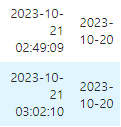

- 실제 날짜는 10월21일 임에도 아직 새벽(02:49)이므로 10월20일로 date 가 정해진 것을 볼 수 있다

### 1-b-3. 불필요한 칼럼 삭제

In [ ]:
# 불필요한 열 삭제
df_date = data.drop(['community', 'search_keyword', 'text_length', 'date_created', 'time_created', 'datetime'], axis=1)
df_date.head(3)

### 1-b-4. 파일로 저장

In [22]:
save_file_path = "7_new_date_ecopro.csv"
df_date.to_csv(save_file_path, index=False, encoding="utf-8")

## 1-c. 데이터 분석

In [12]:
# 파일 불러오기
import pandas as pd
import ast

# 데이터를 불러옵니다.
df_date = pd.read_csv('7_new_date_ecopro.csv', encoding="utf-8")

# 'tokens' 열의 데이터를 리스트로 처리합니다. (이미 리스트인 경우 이 단계는 생략)
df_date['tokens'] = df_date['tokens'].apply(ast.literal_eval)
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108945 entries, 0 to 108944
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   gall_id      108945 non-null  object
 1   number       108945 non-null  int64 
 2   author       108945 non-null  object
 3   is_reply     108945 non-null  int64 
 4   spaced_text  108945 non-null  object
 5   tokens       108945 non-null  object
 6   date         108945 non-null  object
dtypes: int64(2), object(5)
memory usage: 5.8+ MB


### 1-c-1. 지정된 기간의 토큰 분포 그래프화 함수

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

def analyze_token_distribution(df, start_date, end_date, tokens):
    """
    Analyzes and visualizes the distribution of specified tokens within a given date range.

    :param df: DataFrame containing the data.
    :param start_date: Start date of the analysis period (inclusive).
    :param end_date: End date of the analysis period (inclusive).
    :param tokens: List of tokens to analyze.
    :return: A DataFrame with token distribution and a plot showing the distribution.
    """
    # 1. 데이터 기간 설정
    sub_df = df[df['date'].between(start_date, end_date)]

    # 2. 분석할 토큰 정하기
    # 3. 해당 토큰의 날짜별 출현 빈도수 계산
    token_distribution = sub_df.groupby('date')['tokens'].sum().apply(lambda x: pd.Series(x).value_counts()).fillna(0)
    token_distribution = token_distribution[tokens]

    # 4. 시각화
    plt.figure(figsize=(12, 6))
    for token in tokens:
        plt.plot(token_distribution.index, token_distribution[token], label=token)
    
    plt.title(f'Token Distribution from {start_date} to {end_date}')
    plt.xlabel('Date')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.show()

    return token_distribution


### 1-c-2. 함수 실행

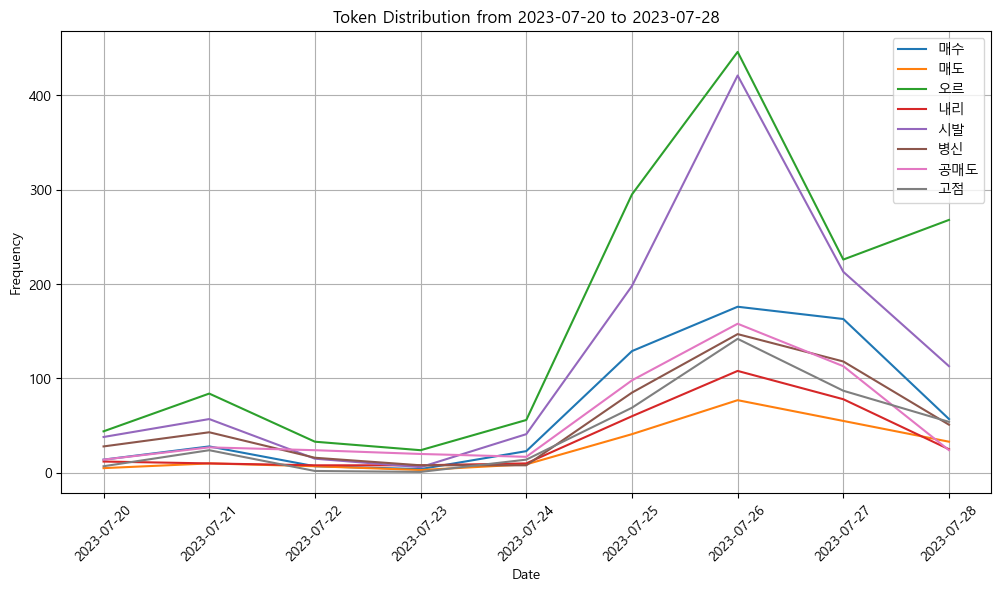

,매수,매도,오르,내리,시발,병신,공매도,고점
date,,,,,,,,
2023-07-20,14.0,5.0,44.0,12.0,38.0,28.0,14.0,7.0
2023-07-21,28.0,10.0,84.0,10.0,57.0,43.0,27.0,24.0
2023-07-22,7.0,7.0,33.0,8.0,15.0,16.0,24.0,2.0
2023-07-23,4.0,3.0,24.0,8.0,6.0,8.0,20.0,1.0
2023-07-24,23.0,9.0,56.0,10.0,41.0,8.0,17.0,14.0
2023-07-25,129.0,41.0,295.0,60.0,198.0,85.0,98.0,69.0
2023-07-26,176.0,77.0,446.0,108.0,421.0,147.0,158.0,142.0
2023-07-27,163.0,55.0,226.0,78.0,213.0,118.0,113.0,87.0
2023-07-28,57.0,33.0,268.0,25.0,113.0,51.0,24.0,54.0


In [23]:
df = df_date
start_date = '2023-07-20'
end_date = '2023-07-28'
tokens = ['매수', '매도', '오르', '내리', '시발', '병신', '공매도', '고점']
analyze_token_distribution(df, start_date, end_date, tokens)

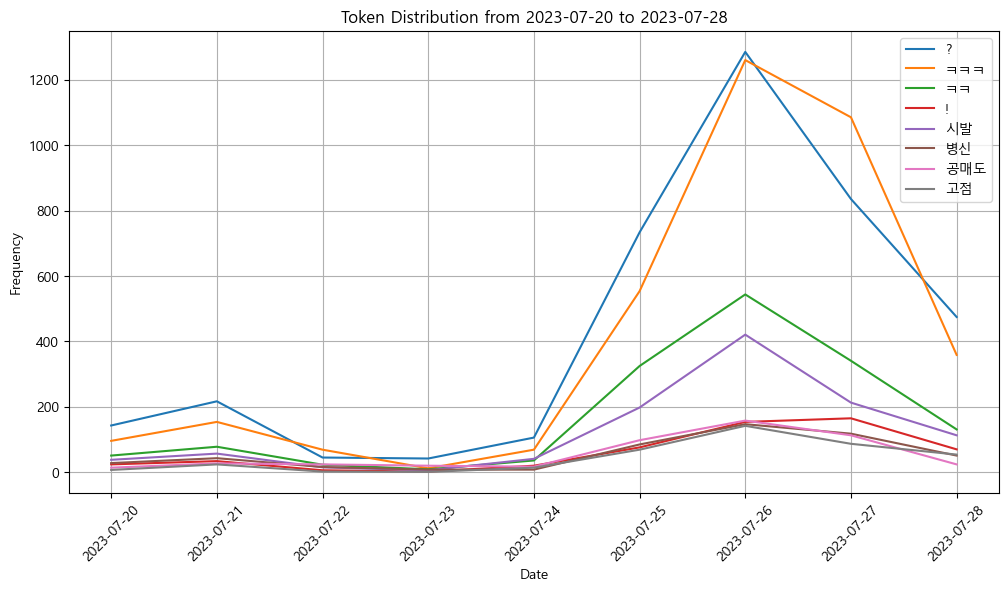

,?,ㅋㅋㅋ,ㅋㅋ,!,시발,병신,공매도,고점
date,,,,,,,,
2023-07-20,143.0,96.0,51.0,24.0,38.0,28.0,14.0,7.0
2023-07-21,217.0,154.0,78.0,34.0,57.0,43.0,27.0,24.0
2023-07-22,45.0,69.0,23.0,6.0,15.0,16.0,24.0,2.0
2023-07-23,42.0,12.0,9.0,2.0,6.0,8.0,20.0,1.0
2023-07-24,106.0,69.0,36.0,20.0,41.0,8.0,17.0,14.0
2023-07-25,734.0,554.0,325.0,76.0,198.0,85.0,98.0,69.0
2023-07-26,1286.0,1261.0,544.0,154.0,421.0,147.0,158.0,142.0
2023-07-27,836.0,1086.0,341.0,165.0,213.0,118.0,113.0,87.0
2023-07-28,475.0,359.0,131.0,70.0,113.0,51.0,24.0,54.0


In [24]:
df = df_date
start_date = '2023-07-20'
end_date = '2023-07-28'
tokens = ['?', 'ㅋㅋㅋ', 'ㅋㅋ', '!', '시발', '병신', '공매도', '고점']
analyze_token_distribution(df, start_date, end_date, tokens)

In [16]:
from collections import Counter

def make_tokens_count_dict(dataframe, column_name):

    # 토큰별로 각 행에서의 출현 여부를 체크
    token_presence = dataframe[column_name].apply(lambda tokens: set(tokens))

    # 모든 행에 대해 토큰의 출현 횟수를 세기
    token_count = Counter()
    for tokens in token_presence:
        token_count.update(tokens)

    # 빈도가 높은 순으로 토큰 정렬
    sorted_tokens = dict(sorted(token_count.items(), key=lambda item: item[1], reverse=True))

    return sorted_tokens

In [18]:
# 함수를 사용하여 딕셔너리를 생성
sorted_tokens_dict = make_tokens_count_dict(df, 'tokens')
sorted_tokens_dict

{'에코프로': 45049,
 '?': 19667,
 'ㅋㅋㅋ': 16522,
 '에코': 10603,
 'ㅋㅋ': 7732,
 '오르': 7397,
 '시발': 5311,
 '지금': 5049,
 '주식': 4960,
 '오늘': 4216,
 '새끼': 4185,
 '만원': 3980,
 '진짜': 3659,
 '이차전지': 3508,
 '존나': 3231,
 '매수': 3212,
 '!': 2639,
 '병신': 2540,
 '생각': 2439,
 '사람': 2422,
 '그냥': 2406,
 '떨어지': 2367,
 'ㄹㅇ': 2322,
 '개미': 2288,
 '근데': 2285,
 'ㅇㅇ': 2271,
 '종목': 2189,
 '공매도': 2007,
 'ㄷㄷ': 1979,
 '들어가': 1968,
 '모르': 1950,
 '고점': 1936,
 '캬ㅋㅋㅋ': 1927,
 '아직': 1882,
 '이제': 1864,
 '수익': 1834,
 '코스닥': 1788,
 '내일': 1772,
 '신성': 1764,
 '내리': 1679,
 '정도': 1645,
 '시총': 1639,
 '다시': 1618,
 'ㄷㄷㄷ': 1600,
 '프로': 1535,
 '나오': 1500,
 '가능': 1456,
 '이유': 1436,
 '회사': 1428,
 '매도': 1419,
 '이상': 1402,
 '국장': 1375,
 '너무': 1365,
 '미친': 1362,
 '테슬라': 1343,
 '주주': 1310,
 '이런': 1307,
 '계속': 1293,
 '포스코': 1274,
 '많이': 1266,
 '상승': 1253,
 '초전도체': 1242,
 '시작': 1220,
 '주가': 1208,
 '실적': 1201,
 '어제': 1181,
 '투자': 1180,
 '하락': 1168,
 '다른': 1163,
 '금양': 1163,
 '간다': 1122,
 '차트': 1107,
 '인버스': 1057,
 '이미': 1048,
 '시장': 1030,
 '거품':